In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

## Загрузка файла

In [3]:
f = open('C:\ML\DataBases\pushkin-metel.txt', 'r', encoding='utf-8')
text = f.read()

In [4]:
type(text)

str

In [5]:
len(text)

22968

## Предварительная обработка текста

In [6]:
text = text.lower()

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

`удаление лишних символов`

In [9]:
text = ''.join([ch for ch in text if ch not in spec_chars])

`удаляем все \n из конца предложений`

In [10]:
import re
text = re.sub('\n', '', text)

In [11]:
def remove_chars_from_text(text, chars):
    """удаление лишних символов"""
    return ''.join([ch for ch in text if ch not in chars])

`удаление цифр`

In [12]:
text = remove_chars_from_text(text, string.digits)

In [13]:
text_tokens = word_tokenize(text)

`перевод в str`

In [14]:
text = nltk.Text(text_tokens)

`рассчет частоты встречаемости слов`

In [ ]:
fdist = nltk.probability.FreqDist(text)
fdist

FreqDist({'и': 146, 'в': 101, 'не': 69, 'что': 54, 'с': 44, 'он': 42, 'она': 39, 'ее': 39, 'на': 31, 'было': 27, ...})

In [ ]:
len(fdist)

1760

`самые встречаемые слова`

In [ ]:
fdist.most_common(5)

[('и', 146), ('в', 101), ('не', 69), ('что', 54), ('с', 44)]

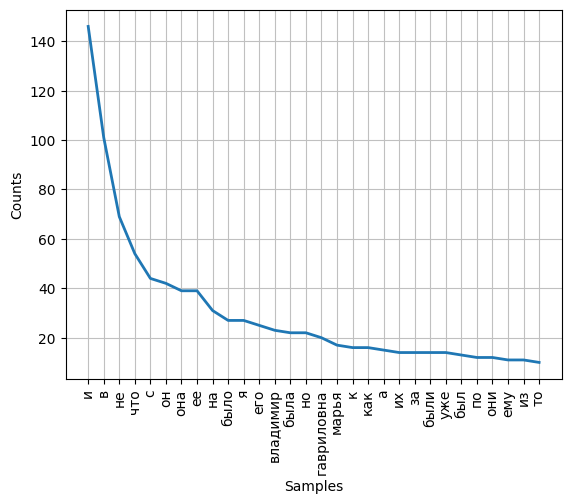

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(30, cumulative=False)

`удаление стоп-слов`

In [ ]:
russian_stopwords = stopwords.words('russian')
russian_stopwords.extend(['это', 'нею'])

In [ ]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]

In [ ]:
len(text_tokens)

2158

In [ ]:
fdist = nltk.probability.FreqDist(text_tokens)
fdist

FreqDist({'владимир': 23, 'гавриловна': 20, 'марья': 17, 'поехал': 9, 'бурмин': 9, 'поминутно': 8, 'метель': 7, 'несколько': 6, 'сани': 6, 'владимира': 6, ...})

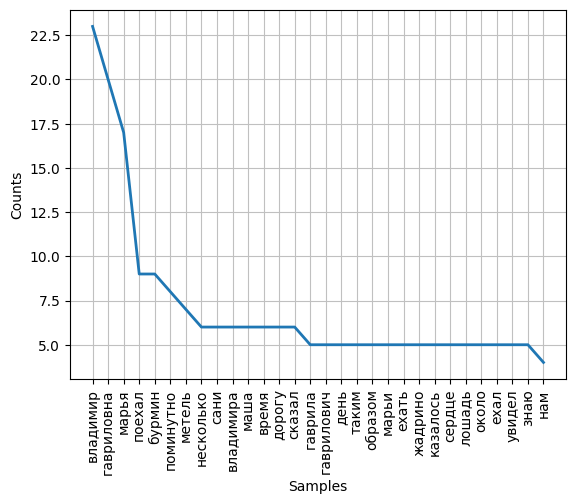

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(30, cumulative=False)

## Построение облака слов

In [ ]:
from wordcloud import WordCloud

In [ ]:
text_raw = ' '.join(text_tokens)

In [ ]:
wordcloud = WordCloud().generate(text_raw)

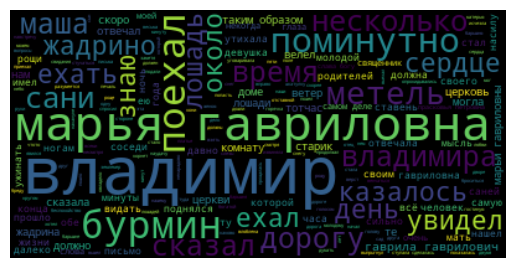

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()